In [3]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import json

In [2]:
physical_devices = tf.config.list_physical_devices('GPU')
tf.config.experimental.set_memory_growth(physical_devices[0], True)

from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.8
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

In [9]:
with open('sarcasm.json','r') as f:
    datastore = json.load(f)

sentences = []
labels = []

for item in datastore:
    sentences.append(item['headline'])
    labels.append(item['is_sarcastic'])

In [42]:
train_param = 20000
vocab_range = 1000
oov_token = '<oov>'
trunc_type = 'post'
max_length = 10000
embedding_dims = 16
padding = 'post'
epochs = 50

In [34]:
train_sentences = sentences[:train_param]
test_sentences = sentences[train_param:]
train_label = labels[:train_param]
test_label = labels[train_param:]

In [35]:
token = Tokenizer(num_words = vocab_range, oov_token = oov_token)
token.fit_on_texts(train_sentences)
word_index = token.word_index
train_seq = token.texts_to_sequences(train_sentences)
train_pad = pad_sequences(train_seq, padding = padding, truncating = trunc_type, maxlen = max_length)

test_seq = token.texts_to_sequences(test_sentences)
test_pad = pad_sequences(test_seq, padding = padding, truncating = trunc_type, maxlen = max_length)

In [44]:
train_pad = np.array(train_pad)
test_pad = np.array(test_pad)
train_label = np.array(train_label)
test_label = np.array(test_label)

In [37]:
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

def decode(text):
    return ' '.join([reverse_word_index.get(i, '?') for i in text])

print(train_pad[0])
print(train_sentences[0])

[328   1 799 ...   0   0   0]
former versace store clerk sues over secret 'black code' for minority shoppers


In [40]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_range, embedding_dims, input_length  = max_length),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(6, activation = 'relu'),
    tf.keras.layers.Dense(1, activation = 'sigmoid')
])

model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [53]:
history = model.fit(train_pad, train_label, epochs = epochs, validation_data = [test_pad, test_label])

Train on 20000 samples, validate on 6709 samples
Epoch 1/50
20000/20000 [==============================] - 23s 1ms/sample - loss: 0.4098 - accuracy: 0.8086 - val_loss: 0.4208 - val_accuracy: 0.8071- accuracy: 0.798 - ETA: 19s - loss: 0.4128 - accur - ETA: 18s - loss: 0.4 - ETA: 1 - ETA: 11s - loss: 0.4146 - a - ETA: 10s -  - ETA: 8s - loss: 0.4136 - ac - ETA: 6s - loss: 0.4125 -  - ETA: 6s - loss: 0.4129 - accuracy - ETA: 6s - loss: 0.4125 -  - ETA: 1s - loss: - ETA: 0s - loss: 0.4094 - accuracy: 0.
Epoch 2/50
20000/20000 [==============================] - 23s 1ms/sample - loss: 0.4100 - accuracy: 0.8086 - val_loss: 0.4348 - val_accuracy: 0.7956A: 21s - loss: 0.4278 - accuracy: 0.800 - ETA: 20s - loss: 0.4348 - accura - ETA: 21s - loss: 0.4548 - accuracy: 0.782 - ETA: 20s - lo - ETA: 19s - loss: 0.4191 - accuracy: - ETA: 18s - l - ETA: 8s - l - ETA: 7s - l
Epoch 3/50
20000/20000 [==============================] - 23s 1ms/sample - loss: 0.4063 - accuracy: 0.8130 - val_loss: 0.4166 - val

20000/20000 [==============================] - 23s 1ms/sample - loss: 0.3849 - accuracy: 0.8225 - val_loss: 0.4052 - val_accuracy: 0.81199s - loss: 0.3956 - accurac - ETA: 19s - loss: 0.3942 - accuracy: 0.8 - ETA: 19s - loss: 0. - ETA: 6s - loss: 0.3820 - accuracy - ETA: 5s - loss: - ETA: 3s - loss: 0.3852 - ac
Epoch 31/50
20000/20000 [==============================] - 23s 1ms/sample - loss: 0.3861 - accuracy: 0.8205 - val_loss: 0.4825 - val_accuracy: 0.7643
Epoch 32/50
20000/20000 [==============================] - 23s 1ms/sample - loss: 0.3848 - accuracy: 0.8191 - val_loss: 0.4033 - val_accuracy: 0.81342s - loss: 0.4215 - accuracy: 0.78 - - ETA: 17s - ETA: 5s - loss: 0.3892 - accuracy: 0.81 - ETA: 5s - ETA - ETA: 2s -
Epoch 33/50
20000/20000 [==============================] - 23s 1ms/sample - loss: 0.3845 - accuracy: 0.8229 - val_loss: 0.4177 - val_accuracy: 0.8030loss: - ETA: 0s - loss: 0.3848 - accu
Epoch 34/50
20000/20000 [==============================] - 23s 1ms/sample - loss: 0

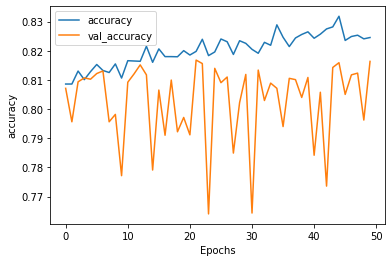

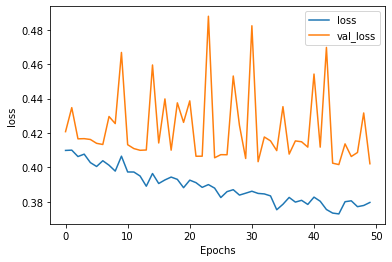

In [54]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
    plt.plot(history.history[string])
    plt.plot(history.history['val_'+string])
    plt.xlabel("Epochs")
    plt.ylabel(string)
    plt.legend([string, 'val_'+string])
    plt.show()

plot_graphs(history, "accuracy")
plot_graphs(history, "loss")